In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_train = r"C:\Users\basde\Downloads\les25_bestanden\train.csv"
data_test = r"C:\Users\basde\Downloads\les25_bestanden\test.csv"
df = pd.read_csv(data_train)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Text(0.5, 1.0, 'Korelasi Data')

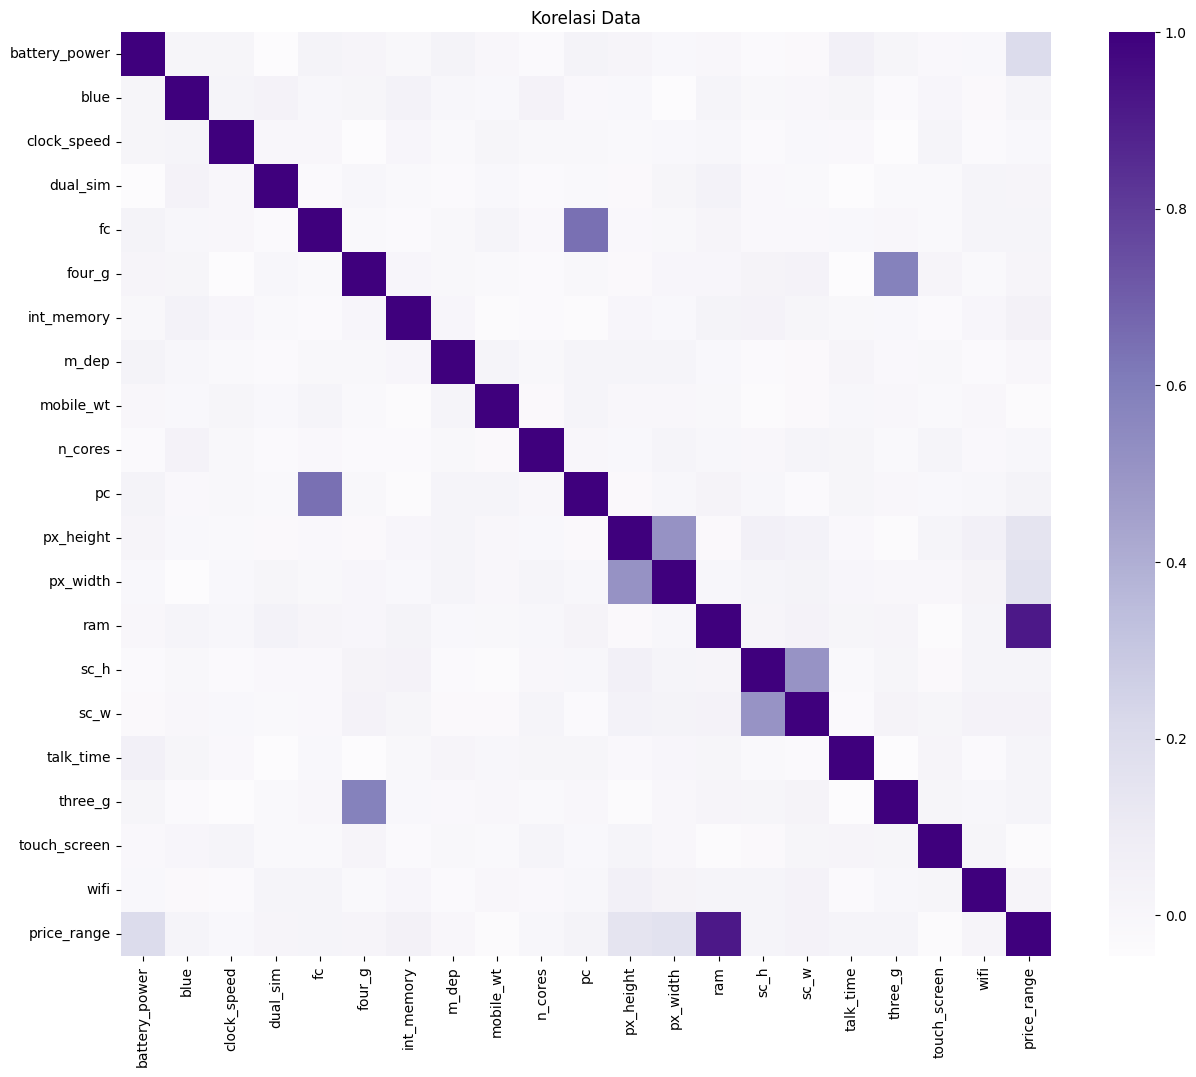

In [3]:
import seaborn as sns
corr = df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Korelasi Data")

In [4]:
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
x = df.drop(['price_range'], axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [6]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
print('train accuracy : ', svm.score(x_train, y_train))
print('test accuracy : ', svm.score(x_test, y_test)) 

train accuracy :  0.95375
test accuracy :  0.9425


In [7]:
cols = x_train.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
print('train accuracy : ', svm.score(X_train, y_train))
print('test accuracy : ', svm.score(X_test, y_test))

train accuracy :  0.986875
test accuracy :  0.8725


In [10]:
cols = x_train.columns
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
print('train accuracy : ', svm.score(X_train, y_train))
print('test accuracy : ', svm.score(X_test, y_test)) 

train accuracy :  0.981875
test accuracy :  0.8975
